In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


The dataset is full of categorical value.

## Cleaning

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [9]:
for i in df.columns.to_list() :
    if df.columns.to_list().index(i) < 4 :
        print(df[i].value_counts(normalize = True))

e    0.517971
p    0.482029
Name: class, dtype: float64
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap-shape, dtype: float64
y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: cap-surface, dtype: float64
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: cap-color, dtype: float64


In [10]:
for i in df.columns.to_list() :
    if df.columns.to_list().index(i) >= 4 and df.columns.to_list().index(i) < 9 :
        print(df[i].value_counts(normalize = True))

f    0.584441
t    0.415559
Name: bruises, dtype: float64
n    0.434269
f    0.265879
y    0.070901
s    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: odor, dtype: float64
f    0.974151
a    0.025849
Name: gill-attachment, dtype: float64
c    0.838503
w    0.161497
Name: gill-spacing, dtype: float64
b    0.690793
n    0.309207
Name: gill-size, dtype: float64


No missing / null value

In [11]:
dfX = df.iloc[:, 1:]
featcol = dfX.columns.to_list()

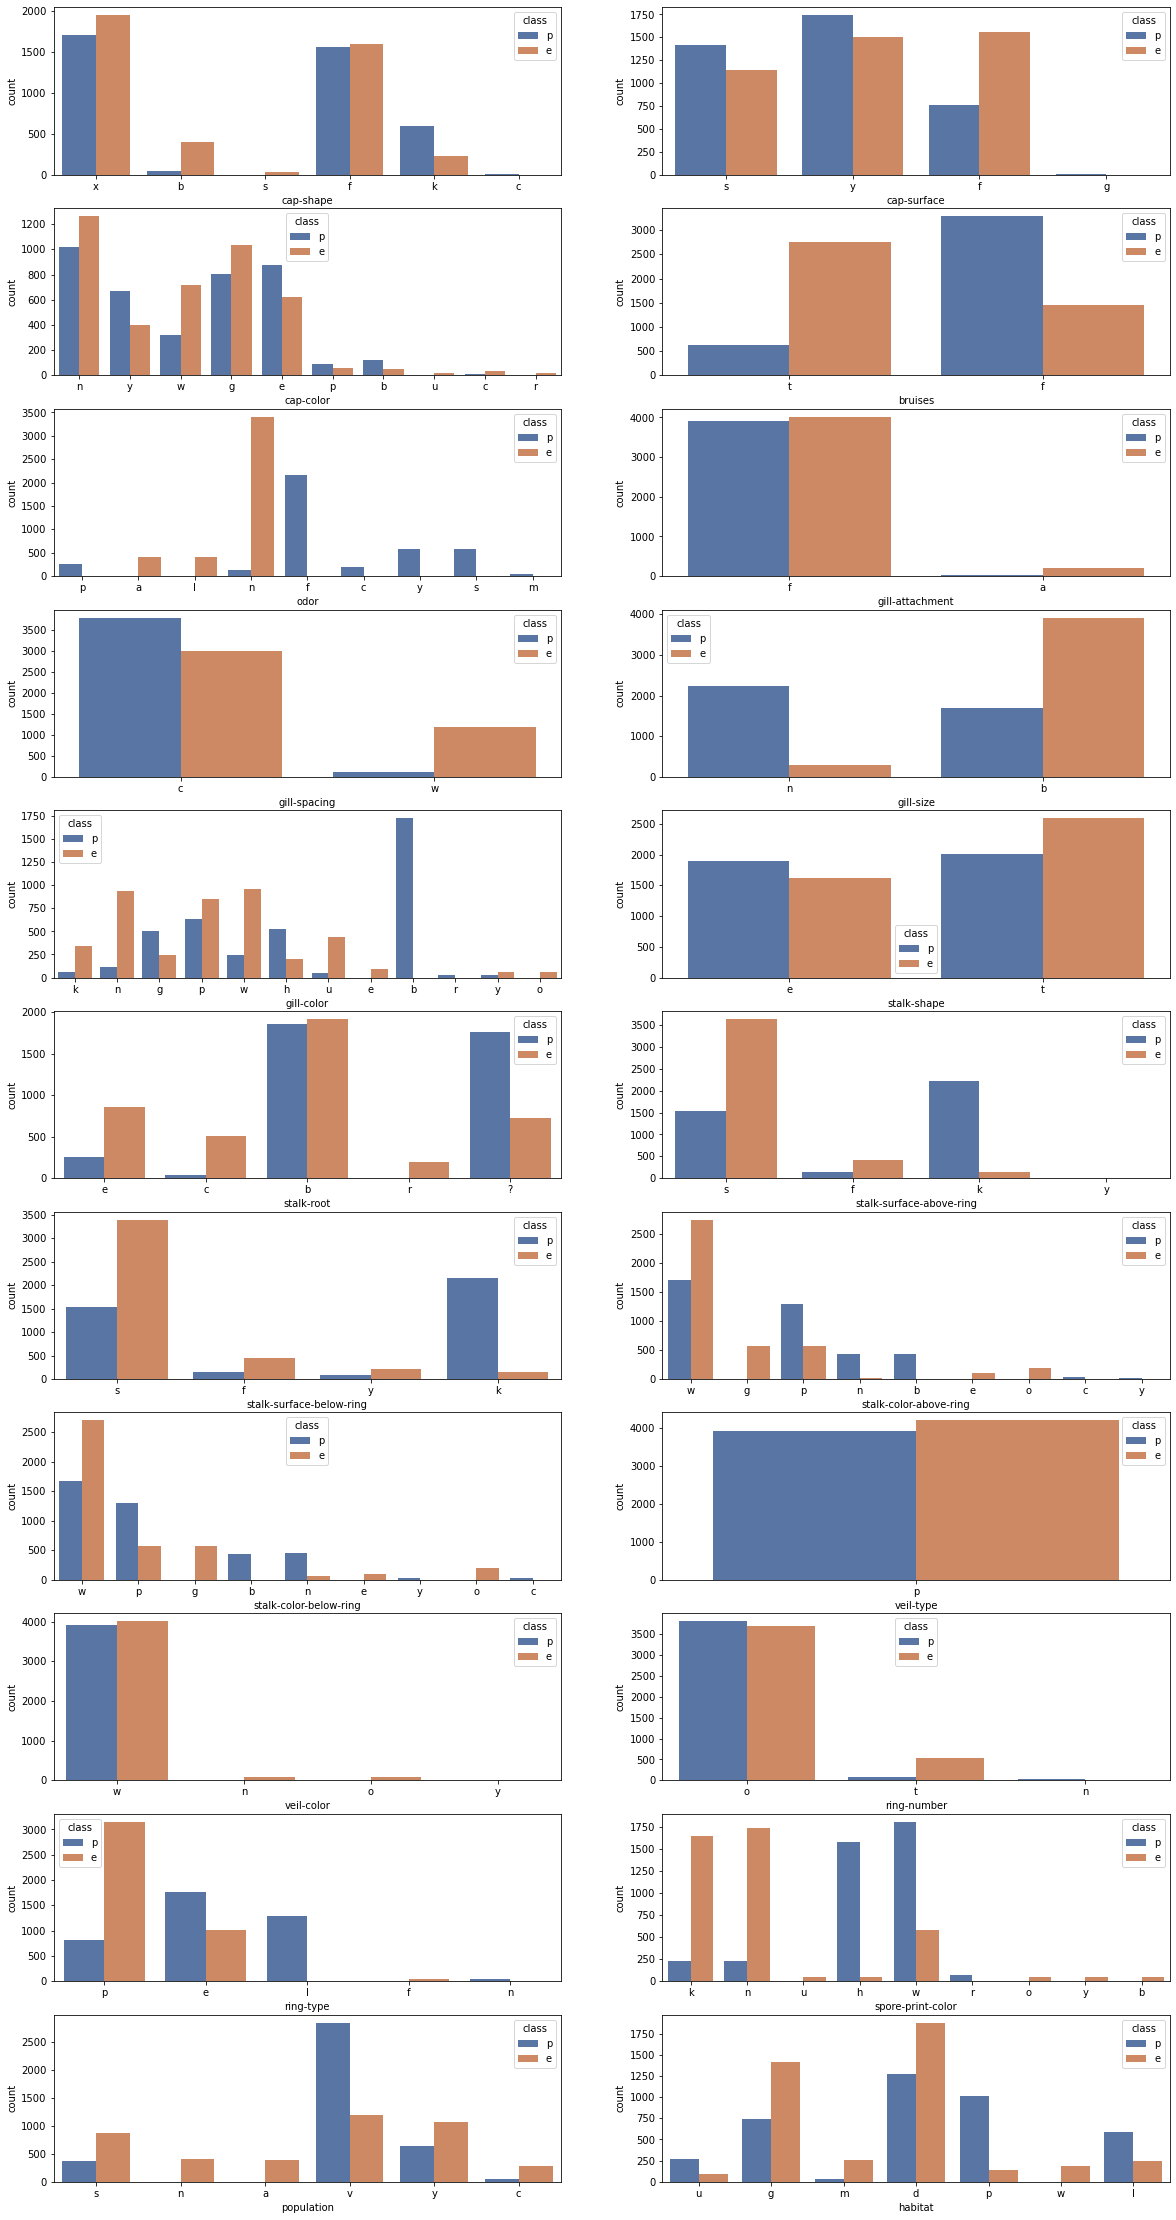

In [12]:
plt.figure(figsize = (20,40))

for i in list(featcol) :
    plt.subplot(11, 2, featcol.index(i) + 1)
    sns.countplot(data = df, x = dfX[i], hue = df['class'], palette='deep')
    
    
plt.show()

In [13]:
df.columns.to_list()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

### One Hot Encoding

In [21]:
dfencoded = pd.get_dummies(df.iloc[:,1:])
dfencoded = pd.concat([df['class'], dfencoded], axis=1)
dfencoded

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,e,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
dfN = df.copy()
for i in df.columns.to_list() :
    labelencoder = LabelEncoder()
    dfN[i] = labelencoder.fit_transform(df[i])
    
dfN

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [19]:
dfN['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

Data sudah balanced

## Modeling

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
StratifiedKFold

In [55]:
X = dfencoded.iloc[:, 1:]
y = dfencoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 128)

In [88]:
def benchmark(model) :
    alg = model
    alg.fit(X_train, y_train)
    y_hat = alg.predict(X_test)
    
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat))
    disp.plot()
    plt.show()
    print(classification_report(y_test, y_hat))
    # Kfold validation
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12)
    print('Cross-val using KFold (5-folds):')
    cvs = cross_val_score(model, X_train, y_train, cv = cv)
    print(f'{cvs.mean()}')
    

#### Logistic Regression

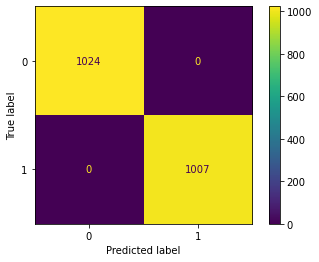

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1024
           p       1.00      1.00      1.00      1007

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross-val using KFold (5-folds):
0.9995075238660993


In [82]:
benchmark(LogisticRegression())

#### Categorical Naive Bayes

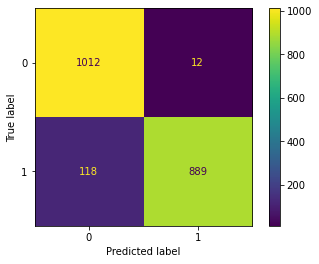

              precision    recall  f1-score   support

           e       0.90      0.99      0.94      1024
           p       0.99      0.88      0.93      1007

    accuracy                           0.94      2031
   macro avg       0.94      0.94      0.94      2031
weighted avg       0.94      0.94      0.94      2031

Cross-val using KFold (5-folds):
0.9363179596185734


In [83]:
benchmark(CategoricalNB())

#### Descision Tree

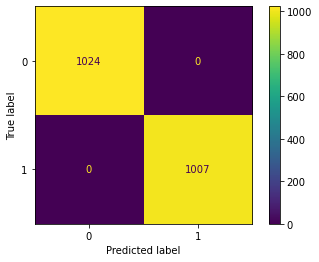

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1024
           p       1.00      1.00      1.00      1007

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross-val using KFold (5-folds):
1.0


In [84]:
benchmark(DecisionTreeClassifier())

#### KNN

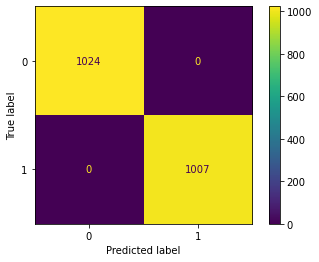

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1024
           p       1.00      1.00      1.00      1007

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross-val using KFold (5-folds):
1.0


In [87]:
benchmark(KNeighborsClassifier())

#### SVC

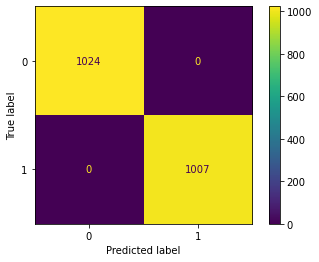

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1024
           p       1.00      1.00      1.00      1007

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross-val using KFold (5-folds):
1.0


In [90]:
benchmark(SVC())

#### Random Forest